In [1]:
from robust_linear_regression import RobustLinearRegression
import numpy as np
import pathlib
import os
import matplotlib.pyplot as plt

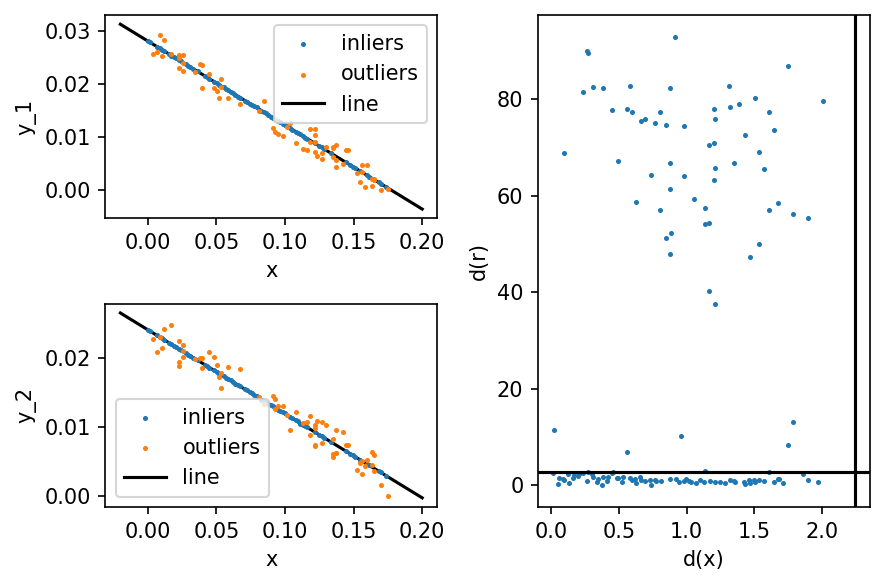

In [2]:
data = np.loadtxt("data.txt")
rlr = RobustLinearRegression()
x = data[:, 0, None]
y = data[:, 1:]
rlr.fit(x, y)
line_x = np.array([[-0.02], [0.20]])
line_y = rlr.predict(line_x)
fig, axd = plt.subplot_mosaic([['y1', 'd'], ['y2', 'd']], dpi=150)
plt.sca(axd["y1"])
plt.scatter(x[~rlr.outliers, 0], y[~rlr.outliers, 0], s=2, label="inliers")
plt.scatter(x[rlr.outliers, 0], y[rlr.outliers, 0], s=2, label="outliers")
plt.plot(line_x, line_y[:, 0], color="k", zorder=-1, label="line")
plt.legend()
plt.xlabel("x")
plt.ylabel("y_1")
plt.sca(axd["y2"])
plt.scatter(x[~rlr.outliers, 0], y[~rlr.outliers, 1], s=2, label="inliers")
plt.scatter(x[rlr.outliers, 0], y[rlr.outliers, 1], s=2, label="outliers")
plt.plot(line_x, line_y[:, 1], color="k", zorder=-1, label="line")
plt.xlabel("x")
plt.ylabel("y_2")
plt.legend()
plt.sca(axd["d"])
plt.scatter(rlr.d_x, rlr.d_r, s=2)
plt.axvline(rlr.d_x_threshold, color="k")
plt.axhline(rlr.d_r_threshold, color="k")
plt.xlabel("d(x)")
plt.ylabel("d(r)")
fig.align_ylabels()
fig.tight_layout()
plt.show()